In [ ]:
# Import required libraries
import sys
import os

# Add notebooks directory to path for notebook_utils
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'notebooks'))

from notebook_utils import setup_environment
setup_environment()

# Import specific modules for this notebook
from models.dictionaries.table_master_dictionary import TableMasterDictionary
from datasets.table_dataset import PubTabNetDataset
from datasets.transforms.get_cells import GetCells
from datasets.transforms.load_tokens import LoadTokens
from datasets.transforms.bbox_encode import BboxEncode
from datasets.transforms.pack_inputs import PackInputs
from datasets.transforms.pad_data import PadData

from mmocr.registry import TRANSFORMS
print('LoadTokens' in TRANSFORMS.module_dict)
print('GetCells' in TRANSFORMS.module_dict)
print('TableResize' in TRANSFORMS.module_dict)
print('TablePad' in TRANSFORMS.module_dict)
print('PadData' in TRANSFORMS.module_dict)
print('TableBboxEncode' in TRANSFORMS.module_dict)
print('PackInputs' in TRANSFORMS.module_dict)
print(TRANSFORMS.module_dict.keys())

True
True
True
True
True
False
True
dict_keys(['GetCells', 'LoadTokens', 'MMDet2MMOCR', 'MMOCR2MMDet', 'PackTextDetInputs', 'PackTextRecogInputs', 'PackKIEInputs', 'LoadImageFromFile', 'LoadImageFromNDArray', 'InferencerLoader', 'LoadOCRAnnotations', 'LoadKIEAnnotations', 'ImgAugWrapper', 'TorchVisionWrapper', 'ConditionApply', 'RandomCrop', 'RandomRotate', 'Resize', 'RemoveIgnored', 'FixInvalidPolygon', 'BoundedScaleAspectJitter', 'RandomFlip', 'SourceImagePad', 'ShortScaleAspectJitter', 'TextDetRandomCropFlip', 'TextDetRandomCrop', 'PyramidRescale', 'RescaleToHeight', 'PadToWidth', 'TextRecogGeneralAug', 'CropHeight', 'ImageContentJitter', 'ReversePixels', 'TableResize', 'TablePad', 'BboxEncode', 'PackInputs', 'PadData'])


In [ ]:
from notebook_utils import load_dataset
from configs import _table_master_base

dataset = load_dataset(_table_master_base, max_data=100, dataset_name="Structure dataset")


🔄 Loading Structure dataset...
✅ Structure dataset loaded successfully: 100 samples
✅ Structure dataset ready for use!


In [ ]:
from notebook_utils import print_random_sample
print_random_sample(dataset)

{
  img_path: F:/data/vitabset/train\143592.png
  sample_idx: 61
  instances: [
  {
    tokens: ['<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</tbody>']
    type: structure
  }
  {
    tokens: ['N', 'ă', 'm']
    cell_id: 0
    type: content
    bbox: [13, 13, 64, 42]
  }
  {
    tokens: ['T', 'ạ', 'p', ' ', 'c', 'h', 'í', '/', ' ', 'T', 'ổ', ' ', 'c', 'h', 'ứ', 'c']
    cell_id: 1
    type: content
    bbox: [78, 13, 238, 42]
  }
  {
    tokens: ['H', 'ạ', 'n', 'g', ' ', 'm', 'ụ', 'c']
    cell_id: 2
    type: content
    bbox: [374, 13, 474, 42]
  }
  {
    tokens: ['C', 'h', 'ú', ' ', 't', 'h', 'í'

In [ ]:
from notebook_utils import create_pipeline
pipeline = create_pipeline(_table_master_base)


=== Step 1: LoadImageFromFile ===
Transform: LoadImageFromFile(ignore_empty=False, min_size=0, to_float32=False, color_type='color', imdecode_backend='cv2', backend_args=None)
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
Added: ['img', 'img_shape', 'ori_shape']
Image shape: (132, 324, 3)


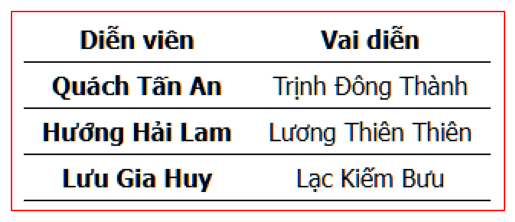


=== Step 2: LoadTokens ===
Transform: LoadTokens(with_structure=True, with_cell=False, max_structure_token_len=600, max_cell_token_len=600)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
Added: ['tokens', 'bboxes', 'masks']
Image shape: (132, 324, 3)


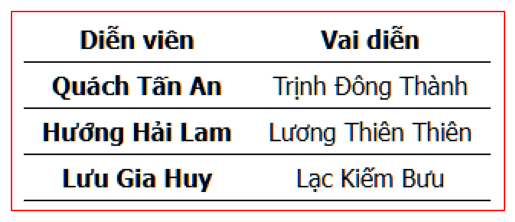


=== Step 3: KeyMapper ===
Transform: KeyMapper(transforms = Compose(
    Resize(scale=(480, 480), scale_factor=None, keep_ratio=True, clip_object_border=True), backend=cv2), interpolation=bilinear)
), mapping = {'img': 'img', 'img_shape': 'img_shape', 'gt_bboxes': 'bboxes'}, remapping = {'img': 'img', 'img_shape': 'img_shape', 'gt_bboxes': 'bboxes'}, auto_remap = True, allow_nonexist_keys = False)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
Modified: ['img', 'img_shape', 'bboxes']
Image shape: (196, 480, 3)


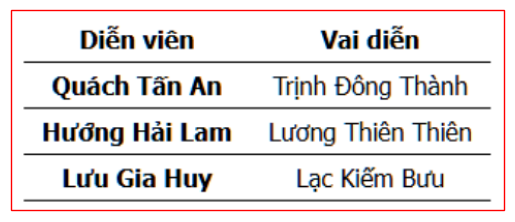


=== Step 4: Pad ===
Transform: Pad(size=(480, 480), size_divisor=None, pad_to_square=False, pad_val={'img': 0, 'seg': 255}), padding_mode=constant)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Added: ['pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Modified: ['img', 'img_shape']
Image shape: (480, 480, 3)


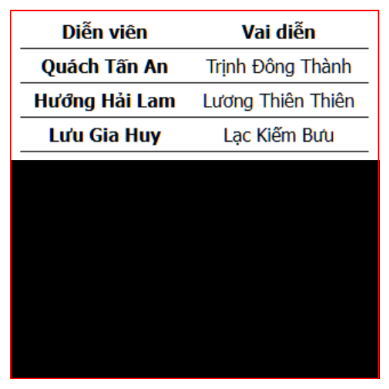


=== Step 5: BboxEncode ===
Transform: BboxEncode
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Modified: ['bboxes']
Image shape: (480, 480, 3)


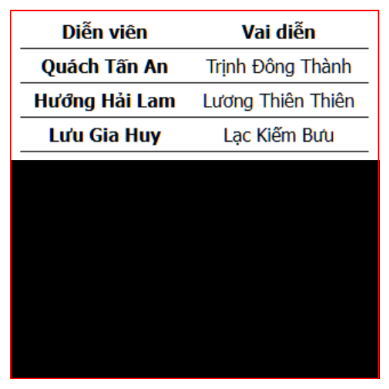


=== Step 6: PadData ===
Transform: PadData(max_seq_len=600, max_bbox_len=600, pad_with=auto)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'indexes', 'padded_indexes', 'padded_bboxes', 'padded_masks']
Added: ['indexes', 'padded_indexes', 'padded_bboxes', 'padded_masks']
Image shape: (480, 480, 3)


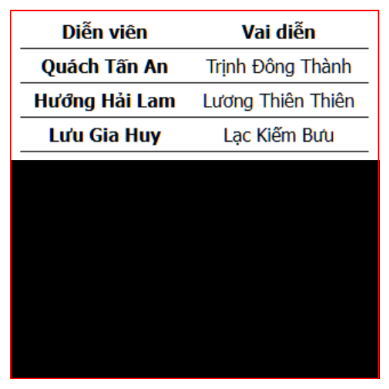


=== Step 7: PackInputs ===
Transform: PackInputs(keys=['img'], meta_keys=('ori_shape', 'img_shape', 'scale_factor', 'pad_shape', 'valid_ratio'), mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'indexes', 'padded_indexes', 'padded_bboxes', 'padded_masks']
After: ['inputs', 'data_samples']
Added: ['inputs', 'data_samples']
Removed: ['img_path', 'sample_idx', 'instances', 'img_info', 'img', 'img_shape', 'ori_shape', 'tokens', 'bboxes', 'masks', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor', 'indexes', 'padded_indexes', 'padded_bboxes', 'padded_masks']
Data samples: <TableMasterDataSample(

    META INFORMATION
    valid_ratio: 1
    img_norm_cfg: 
        mean: [0.5, 0.5, 0.5]
        std: [0.5, 0.5, 0.5]
    scale_factor: None
    ori_shape: (132, 324)
    pad_shape: (480, 480, 3)
    img_shape: (480, 480)

    DATA F

In [ ]:
from notebook_utils import debug_full_pipeline
import random

result = debug_full_pipeline(dataset, _table_master_base.data_pipeline)